## Data: Estimation of obesity levels based on eating habits and physical condition

* This [obesity dataset](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) 
include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

* This dataset is originally available at UC Irvine Machine Learning Repository via the [Link](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition). The related paper is also available 
in [here](https://www.sciencedirect.com/science/article/pii/S2352340919306985).

* The variables in the dataset are: 

   * `Gender`: A binary variable with levels **Female** and **Male**.
   * `Age`: A numerical variable in years.
   * `Height`: A numerical variable in meters.
   * `Weight`: A numerical variable in kilograms.
   * `family_history_with_overweight`: A binary variable with levels **Yes** and **No** showing whether a family member suffered/suffers from overweight.
   * `FAVC` : A binary variable with levels **Yes** and **No** showing frequency of consumption of high caloric food.
   * `FCVC` : A numerical variable here. Frequency of consumption of vegetables (**Interestingly, it is a categorical variable in the paper**).
   * `NCP` : A numerical variable here. Number of main meals (**Interestingly, it is a categorical variable in the paper**).
   * `CAEC` : An ordinal variable with four levels **No**, **Sometimes**, **Frequently**, and **Always** showing consumption of food between meals.    
   * `SMOKE` : A binary variable with levels **Yes** and **No** showing smoking habit.
   * `CH2O` : A numerical variable here. Consumption of water daily (**Interestingly, it is a categorical variable in the paper**).
   * `SCC` : A binary variable with levels **Yes** and **No** showing calories consumption monitoring.
   * `FAF` : A numerical variable here. Physical activity frequency (**Interestingly, it is a categorical variable in the paper**).
   * `TUE` : A numerical variable here. Time using technology devices (**Interestingly, it is  a categorical variable in the paper**). 
   * `CALC` : An ordinal variable with four levels **No**, **Sometimes**, **Frequently**, and **Always** showing consumption of alcohol
   frequency.
   * `MTRANS` : A nominal variable with four levels **Public_Transportation**, **Automobile**, **Walking**, **Motorbike**, 
   and **Bike** showing transportation type used.
   * `NObeyesdad`:  Another nominal variable (**not clear**). 
   
* A portion of the data set is shown below:   

In [1]:
# importing the data set
import pandas as pd

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
# checking the first five lines
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

**Step 1:** In order to change this problem into a regression problem, following [Center for Disease Control and Prevention(CDC)](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html#:~:text=With%20the%20metric%20system%2C%20the,to%20obtain%20height%20in%20meters.), create the BMI variable as your **response variable** as follows:


$$
BMI = weight (kg) / [height (m)]^2,
$$

and include the **numerical features** `Age`, `FCVC`,	`NCP`,`CH2O`, `FAF`, and `TUE` in your dataset only. Show the first 5 lines of your dataset.

In [4]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [5]:
# Calculating BMI and creating a new column 'BMI' in the dataset.
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Selecting the columns that were mentioned
selected_columns = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']

# Creating a new dataset with the selected columns
df = df[selected_columns]

# Showing the first 5 rows of the new dataset
df.head(5)

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI
0,21.0,2.0,3.0,2.0,0.0,1.0,24.386526
1,21.0,3.0,3.0,3.0,3.0,0.0,24.238227
2,23.0,2.0,3.0,2.0,2.0,1.0,23.765432
3,27.0,3.0,3.0,2.0,2.0,0.0,26.851852
4,22.0,2.0,1.0,2.0,0.0,0.0,28.342381


**Step 2:**  Decision Tree Regressor Implementation

- Implement a decision tree regressor to your data set.
- This part may involve tuning of hyper parameters of decision tree regressor with respect to **mean squared error** metric.
- Visualize the best performing decision tree here.
- Comment on the feature importance here. 

In [6]:
# Part of Preprocessing
df = pd.get_dummies(df, drop_first=True)
X = df.drop('BMI', axis=1)
y = df['BMI']

In [38]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Creating a DecisionTreeRegressor and tune hyperparameters
grid = {'max_depth': range(1, 11), 'min_samples_split': range(2, 21)}
dtr_regressor = DecisionTreeRegressor(random_state=1773)
grid_search = GridSearchCV(dtr_regressor, grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1773),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(2, 21)},
             scoring='neg_mean_squared_error')

In [40]:
# Getting the best model
best_dtr = grid_search.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=8, min_samples_split=19, random_state=1773)

In [41]:
# Finding the best model
y_pred_dtr = best_dtr.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Decision Tree Regressor Mean Squared Error:", mse_dtr)

Decision Tree Regressor Mean Squared Error: 23.913564037180297


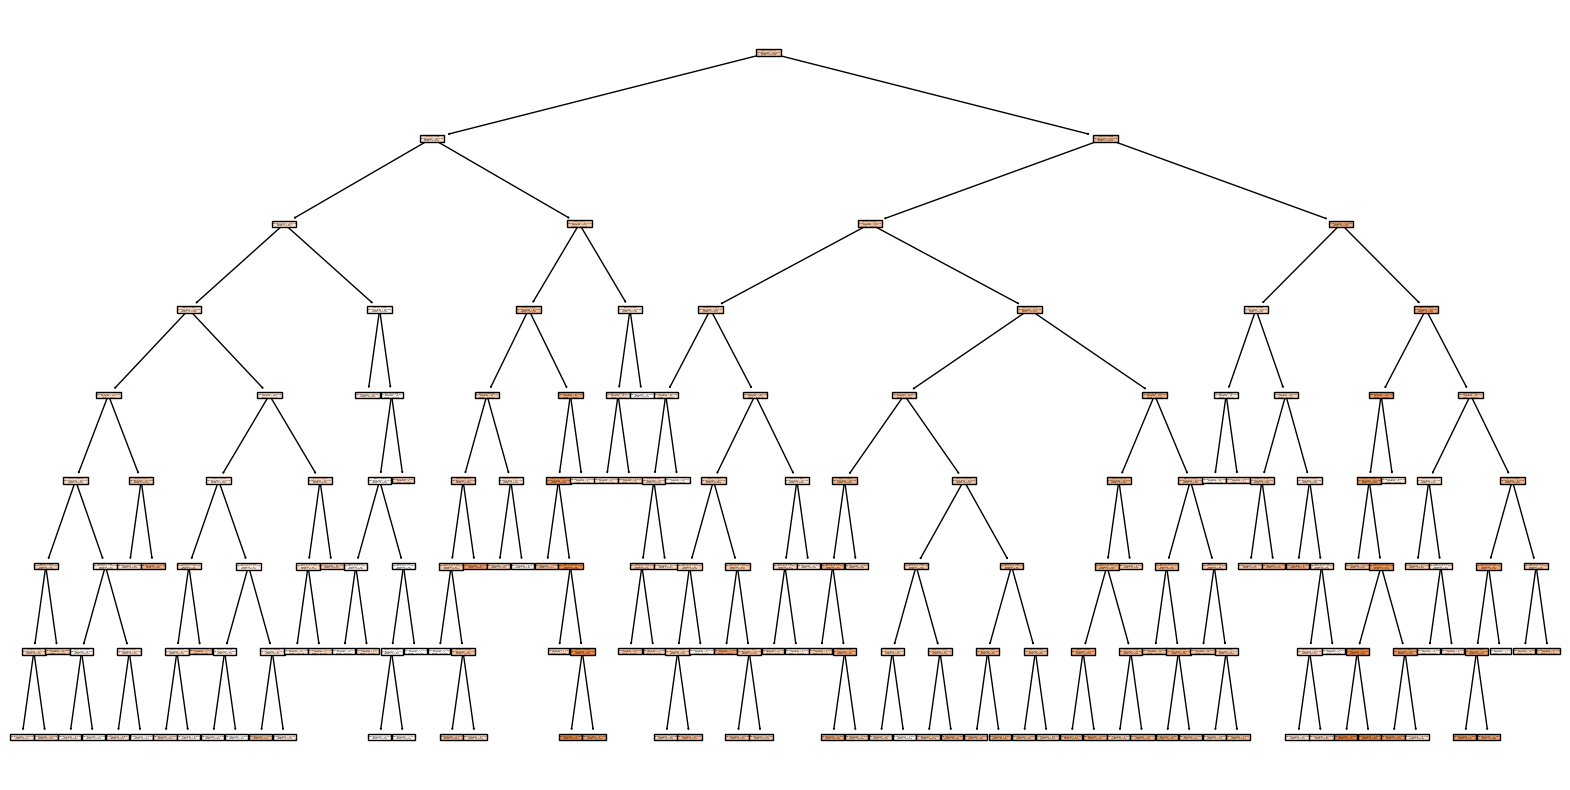

In [11]:
# Visualizing the best performing decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dtr, feature_names=X.columns, filled=True)
plt.show()

In [42]:
# Feature importance
importances_dtr = pd.Series(best_dtr.feature_importances_, index=X.columns)
print("Decision Tree Feature Importance:\n", importances_dtr)

Decision Tree Feature Importance:
 Age     0.324053
FCVC    0.138294
NCP     0.097909
CH2O    0.059568
FAF     0.091800
TUE     0.288375
dtype: float64


The feature importances show that Age and TUE are the most important factors on predicting the BMI value, while other features like CH2O and FAF have less impact.

**Step 3:** Random Forest Tree Regressor Implementation

- Implement a random forest tree regressor to your data set.
- This part may involve tuning of hyper parameters of random forest regressor.
- Visualize one of the trees in the best performing random forest regressor.
- Comment on the feature importance here.

In [13]:
# Creating a RandomForestRegressor and tune hyperparameters
grid_rfr = {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1, 11), 'min_samples_split': range(2, 21)}
rfr_regressor = RandomForestRegressor(random_state=1773)
grid_search_rfr = GridSearchCV(rfr_regressor, grid_rfr, scoring='neg_mean_squared_error', cv=5)
grid_search_rfr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1773),
             param_grid={'max_depth': range(1, 11),
                         'min_samples_split': range(2, 21),
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [14]:
# Getting the best performing model
best_rfr = grid_search_rfr.best_estimator_
best_rfr

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=200,
                      random_state=1773)

In [15]:
# Evaluating the best performing model
y_pred_rfr = best_rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Random Forest Regressor Mean Squared Error:", mse_rfr)

Random Forest Regressor Mean Squared Error: 15.977287389246666


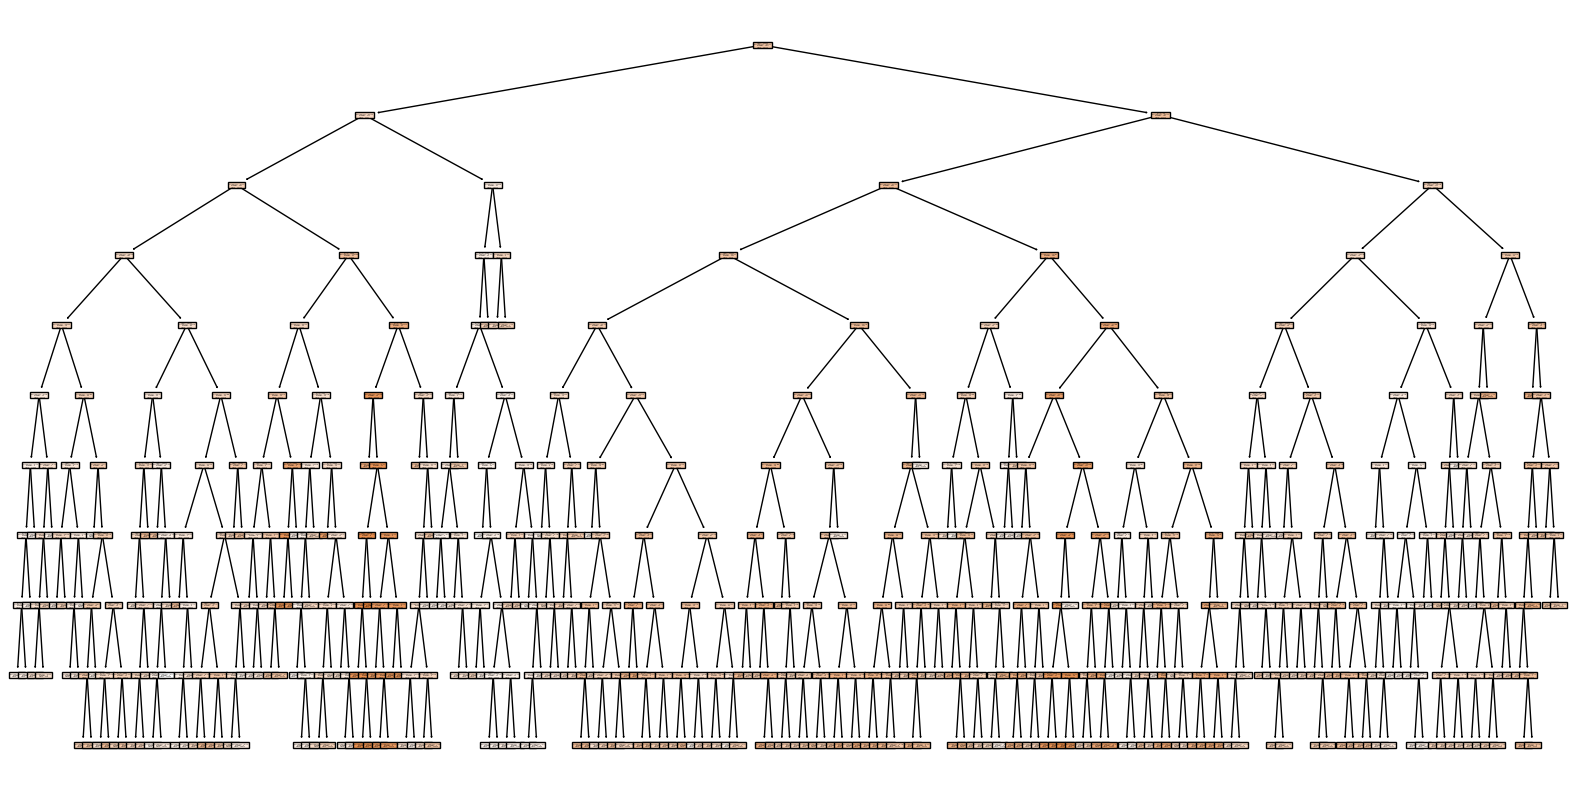

In [16]:
# Visualizing one of the trees in the best performing random forest regressor.
plt.figure(figsize=(20, 10))
plot_tree(best_rfr.estimators_[0], feature_names=X.columns, filled=True)
plt.show()

In [43]:
# Feature importance
importances_rfr = pd.Series(best_rfr.feature_importances_, index=X.columns)
print("Random Forest Feature Importance:\n", importances_rfr)

Random Forest Feature Importance:
 Age     0.300341
FCVC    0.177117
NCP     0.107016
CH2O    0.076632
FAF     0.095100
TUE     0.243793
dtype: float64


The feature importance for the random forest regressor also show that Age and TUE are the most important factors on predicting the BMI value, while other features like FAF and CH2O have less impact.

**Step 4:** 

- Pick the best performing model.
- Provide detailed explanation on why you picked this model as the final model here and talk about the feature importance.

In [18]:
best_model = best_dtr if mse_dtr < mse_rfr else best_rfr
print("Best Model:", best_model)

Best Model: RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=200,
                      random_state=1773)


RandomForestRegressor(max_depth=10, min_samples_split=3, random_state=1773) is the model that performs the best when measured by the mean squared error metric. The results of the Decision Tree Regressor and Random Forest Regressor models indicate that TUE and age are the most significant predictors of BMI. This suggests that an individual's age and the amount of time they spend using technology have an impact on their BMI value of more than 50% for both models. Interestingly, however, other characteristics such as the frequency of physical activity and daily water consumption had less of an effect on the BMI. 